In [3]:
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path

from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

from MCForecastTools import MCSimulation
from pylab import rcParams

In [4]:
file_path = Path("gdp_data_new.csv")
gdp_data = pd.read_csv(file_path, index_col="DATE")

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
timeframe = "1D"

start_date = pd.Timestamp("2004-11-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-01", tz="America/New_York").isoformat()


tickers = ["SPY","DIA","QQQ","GLD","IEF"]

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index=df_ticker.index.date
df_ticker.head()

DIA                                      GLD                \
              open    high     low   close    volume   open   high    low   
2008-01-02  132.47  132.67  129.82  130.38  14555063  83.56  85.14  83.44   
2008-01-03  130.69  131.27  130.13  130.46   7867911  84.87  85.94  84.60   
2008-01-04  129.57  129.73   98.92   98.94  15489641  85.38  85.55  84.43   
2008-01-07   99.06  128.62   98.08  128.26  22119983  85.24  85.26  84.57   
2008-01-08  128.53  129.00   97.05   97.15  23484347  86.25  87.13  86.16   

                             ...    QQQ                                  \
            close    volume  ...   open   high    low  close     volume   
2008-01-02  84.84  11975400  ...  51.27  51.47  50.13  50.41  149569531   
2008-01-03  85.53   9079600  ...  50.39  50.76  50.15  50.43  104746815   
2008-01-04  85.11   7676100  ...  49.79  49.83  48.25  48.28  193237479   
2008-01-07  84.77   6331500  ...  48.41  48.68  47.43  48.17  220176338   
2008-01-08  86.77   8969400  ...  48.29  48.76  46.97  46.98  236721448   

               SPY                                     
              open    high     low   close     volume  
2008-01-02  146.53  146.99  143.88  144.55  175801806  
2008-01-03  144.92  145.49  144.12  144.46  111357758  
2008-01-04  143.34  143.44  140.92  140.93  195945264  
2008-01-07  141.81  142.23  140.10  141.46  220398905  
2008-01-08  142.10  142.90  138.63  138.81  303249870  

[5 rows x 25 columns]

In [9]:
MC_Sim = MCSimulation(
    portfolio_data = df_ticker,
    weights=[0.2,0.2,0.2,0.2,0.2],
    num_simulation=1000,
    num_trading_days=252,
)

In [10]:
MC_Sim.portfolio_data.head()

DIA                                                   GLD  \
              open    high     low   close    volume daily_return   open   
2008-01-02  132.47  132.67  129.82  130.38  14555063          NaN  83.56   
2008-01-03  130.69  131.27  130.13  130.46   7867911     0.000614  84.87   
2008-01-04  129.57  129.73   98.92   98.94  15489641    -0.241607  85.38   
2008-01-07   99.06  128.62   98.08  128.26  22119983     0.296341  85.24   
2008-01-08  128.53  129.00   97.05   97.15  23484347    -0.242554  86.25   

                                 ...    QQQ                                 \
             high    low  close  ...    low  close     volume daily_return   
2008-01-02  85.14  83.44  84.84  ...  50.13  50.41  149569531          NaN   
2008-01-03  85.94  84.60  85.53  ...  50.15  50.43  104746815     0.000397   
2008-01-04  85.55  84.43  85.11  ...  48.25  48.28  193237479    -0.042633   
2008-01-07  85.26  84.57  84.77  ...  47.43  48.17  220176338    -0.002278   
2008-01-08  87.13  86.16  86.77  ...  46.97  46.98  236721448    -0.024704   

               SPY                                                  
              open    high     low   close     volume daily_return  
2008-01-02  146.53  146.99  143.88  144.55  175801806          NaN  
2008-01-03  144.92  145.49  144.12  144.46  111357758    -0.000623  
2008-01-04  143.34  143.44  140.92  140.93  195945264    -0.024436  
2008-01-07  141.81  142.23  140.10  141.46  220398905     0.003761  
2008-01-08  142.10  142.90  138.63  138.81  303249870    -0.018733  

[5 rows x 30 columns]

In [11]:
MC_Sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.976402,0.991810,1.026613,0.991154,1.007412,0.992617,1.008797,0.971588,1.000495,0.983426,...,1.023963,1.009644,1.012669,1.017892,0.992854,0.995028,1.003710,1.024102,1.030978,1.001716
2,0.968143,1.006040,1.070199,1.010614,1.000643,0.992145,1.036018,0.966937,0.991387,0.949329,...,1.051576,1.025646,1.011077,1.021383,0.975253,1.020072,1.004058,1.013264,1.016535,1.030521
3,0.950515,1.009556,1.062910,1.011451,1.012401,1.032127,1.050646,1.018458,1.003551,0.956272,...,1.078321,1.035654,0.994135,1.005466,0.976212,1.028723,0.995742,1.007454,1.034327,1.050036
4,0.931236,1.006867,1.060640,1.032768,1.011939,1.016373,1.009565,1.019808,0.976767,0.961548,...,1.117941,1.048006,1.043223,0.985515,0.968767,1.022593,1.018714,0.987203,1.040971,1.037883
5,0.929067,1.022570,1.063451,1.039161,1.019040,1.008033,0.991504,0.995088,0.992312,0.973509,...,1.112797,1.061890,1.055906,1.001490,0.975893,1.000909,1.023950,1.003071,1.054075,1.066756
6,0.914981,0.989204,1.092811,1.034730,1.035607,1.043491,1.005659,1.005703,0.987590,0.962580,...,1.104312,1.036173,1.051662,0.994723,0.980668,0.992173,1.013785,0.983441,1.057909,1.090546
7,0.873781,0.993253,1.068483,1.018185,1.056483,1.013786,1.037794,0.965343,0.987021,0.958176,...,1.099943,1.046708,1.071160,0.994871,0.981976,1.004099,1.045024,1.005967,1.045802,1.085202
8,0.874306,0.957079,1.045061,1.052386,1.078456,1.046125,1.063190,0.991617,0.960853,0.966684,...,1.090956,1.063917,1.062999,0.976350,1.010741,1.026975,1.036979,1.010728,1.013449,1.055023
9,0.880014,1.007660,1.044906,1.075473,1.077705,1.056898,1.060872,0.980444,0.965167,0.961461,...,1.111782,1.035143,1.044606,0.962070,0.992966,1.054234,1.012864,1.040887,1.014488,1.053596


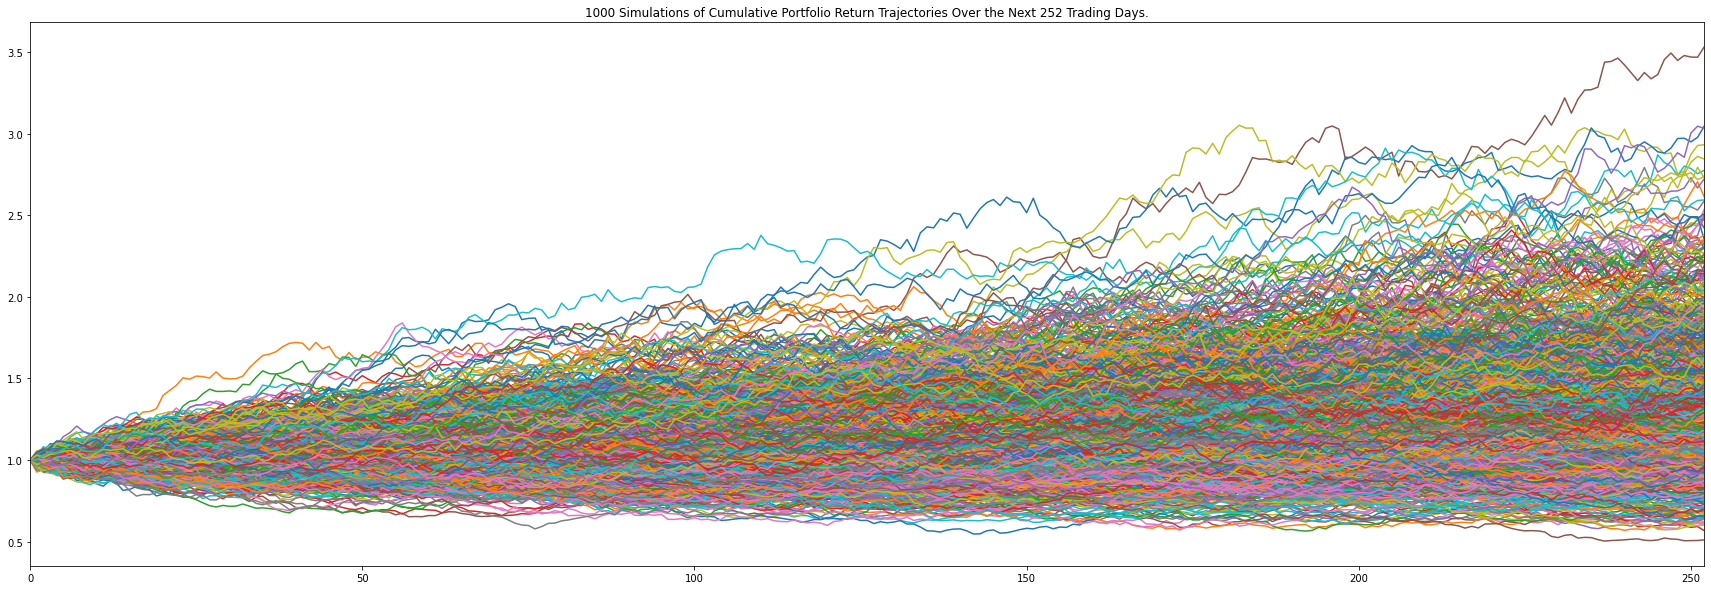

In [12]:
rcParams['figure.figsize']=30,10
line_plot = MC_Sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

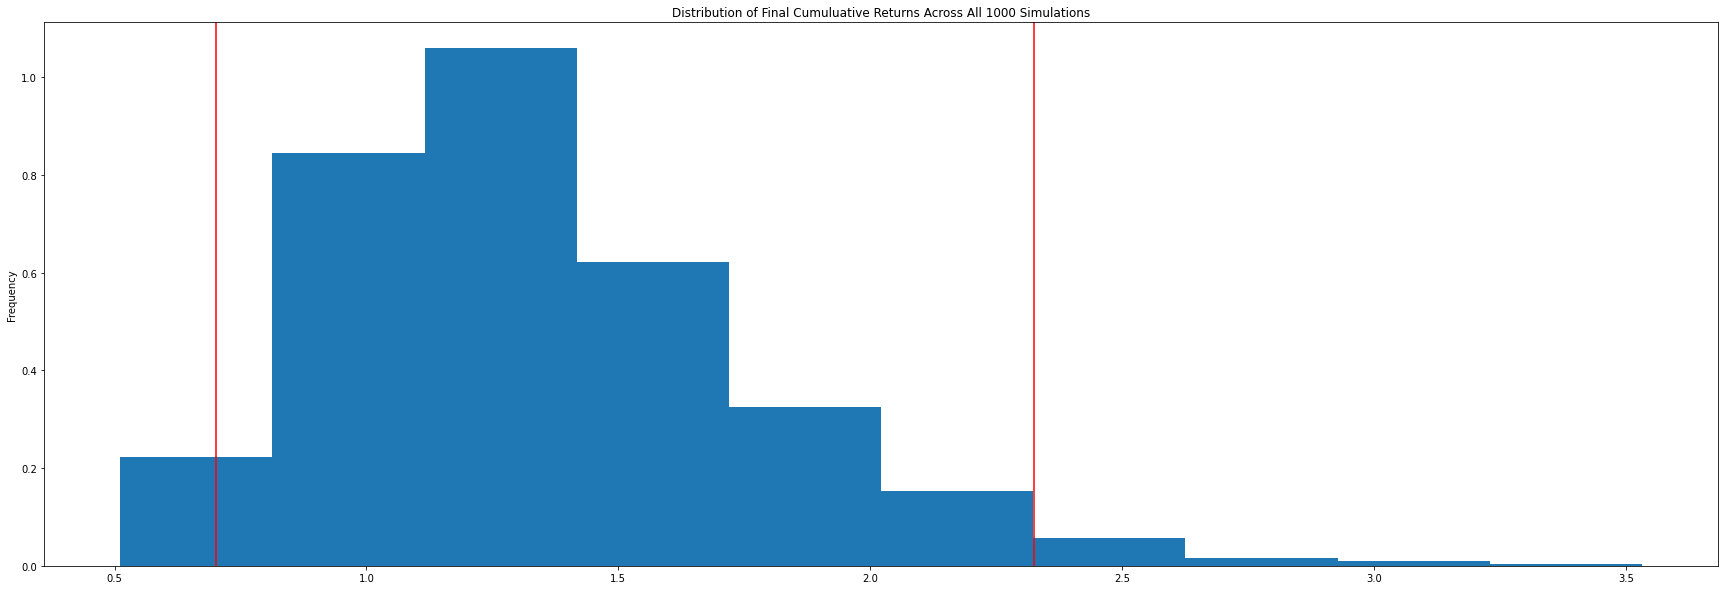

In [13]:
MC_Sim.plot_distribution()

In [14]:
tbl = MC_Sim.summarize_cumulative_return()
print(tbl)

count           1000.000000
mean               1.347271
std                0.420967
min                0.511110
25%                1.042654
50%                1.287555
75%                1.570871
max                3.531783
95% CI Lower       0.700464
95% CI Upper       2.325396
Name: 252, dtype: float64
